### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

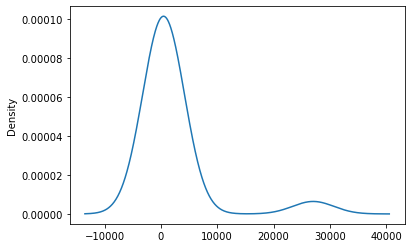

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

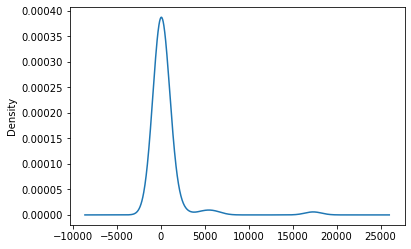

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\mouha\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

In [14]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3 

#### Attempt 1 Increase the number of epochs to 200

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 794us/step - loss: 0.5696 - accuracy: 0.7235
Epoch 2/200
804/804 [==============================] - 1s 901us/step - loss: 0.5538 - accuracy: 0.7311
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7322: 0s - loss: 0.5510 
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7318
Epoch 5/200
802/804 [============================>.] - ETA: 0s - loss: 0.5481 - accuracy: 0.7332
Epoch 00005: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.7333
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7336
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7332
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7350
Epoch 9/200
804/804 [======

804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7397
Epoch 65/200
787/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7394
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7402
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7409
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7399
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7395
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5349 - accuracy: 0.7403
Epoch 70/200
789/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7403
Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5352 - accuracy: 0.7404
Epoch 71/200
80

804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7408
Epoch 127/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7422
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5321 - accuracy: 0.7418
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.7416
Epoch 130/200
797/804 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7420
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7421
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.7415: 
Epoch 132/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.7411
Epoch 133/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7419
Epoch 134/200
804/804 [======================

Epoch 189/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5304 - accuracy: 0.7422
Epoch 190/200
776/804 [===========================>..] - ETA: 0s - loss: 0.5315 - accuracy: 0.7413
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7419
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7421
Epoch 192/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7429
Epoch 193/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7420
Epoch 194/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7421
Epoch 195/200
788/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7429
Epoch 00195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5717 - accuracy: 0.7269 - 384ms/epoch - 1ms/step
Loss: 0.571734607219696, Accuracy: 0.7268804907798767


#### Attempt 2 Define a model with 3 hidden layers

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# Define the model: 3 hidden layers with 80, 40, and 30 nodes and relu activation function at inner layers
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

nn_optimized = tf.keras.models.Sequential()
# Input layer and first hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,021
Trainable params: 8,021
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Add model weight checkpoints during training
os.makedirs("checkpoints_optimized/", exist_ok=True)
checkpoint_path="checkpoints_optimized/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [35]:
# Train the model
fit_model_optimized = nn_optimized.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.74 - 1s 918us/step - loss: 0.5303 - accuracy: 0.7415
Epoch 2/200
804/804 [==============================] - 1s 882us/step - loss: 0.5293 - accuracy: 0.7432
Epoch 3/200
804/804 [==============================] - 1s 947us/step - loss: 0.5290 - accuracy: 0.7422
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7421: 0s - loss: 0.5301 - accuracy: 0. - ETA: 0s - loss: 0.5301 - accura
Epoch 5/200
777/804 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7419
Epoch 00005: saving model to checkpoints_optimized\weights.5.hdf5
804/804 [==============================] - 1s 917us/step - loss: 0.5298 - accuracy: 0.7419
Epoch 6/200
804/804 [==============================] - 1s 931us/step - loss: 0.5292 - accuracy: 0.7420
Epoch 7/200
804/804 [==============================] - 1s 953us/step - loss: 0.5291 - accuracy: 0.7428
Epoch 8/200
804/804 

772/804 [===========================>..] - ETA: 0s - loss: 0.5282 - accuracy: 0.7424
Epoch 00060: saving model to checkpoints_optimized\weights.60.hdf5
804/804 [==============================] - 1s 990us/step - loss: 0.5289 - accuracy: 0.7416
Epoch 61/200
804/804 [==============================] - 1s 918us/step - loss: 0.5284 - accuracy: 0.7427
Epoch 62/200
804/804 [==============================] - 1s 854us/step - loss: 0.5290 - accuracy: 0.7417
Epoch 63/200
804/804 [==============================] - 1s 872us/step - loss: 0.5290 - accuracy: 0.74270s - loss: 0.5288 - accuracy: 0.74
Epoch 64/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7422
Epoch 65/200
801/804 [============================>.] - ETA: 0s - loss: 0.5283 - accuracy: 0.7427
Epoch 00065: saving model to checkpoints_optimized\weights.65.hdf5
804/804 [==============================] - 1s 829us/step - loss: 0.5282 - accuracy: 0.7428
Epoch 66/200
804/804 [==============================]

804/804 [==============================] - 1s 967us/step - loss: 0.5282 - accuracy: 0.7430
Epoch 118/200
804/804 [==============================] - 1s 940us/step - loss: 0.5277 - accuracy: 0.7432
Epoch 119/200
804/804 [==============================] - 1s 856us/step - loss: 0.5280 - accuracy: 0.7434
Epoch 120/200
773/804 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7416
Epoch 00120: saving model to checkpoints_optimized\weights.120.hdf5
804/804 [==============================] - 1s 930us/step - loss: 0.5283 - accuracy: 0.7427
Epoch 121/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7431
Epoch 122/200
804/804 [==============================] - 1s 850us/step - loss: 0.5291 - accuracy: 0.7426
Epoch 123/200
804/804 [==============================] - 1s 915us/step - loss: 0.5288 - accuracy: 0.7427
Epoch 124/200
804/804 [==============================] - 1s 875us/step - loss: 0.5280 - accuracy: 0.7436
Epoch 125/200
763/804 [

Epoch 176/200
804/804 [==============================] - 1s 869us/step - loss: 0.5277 - accuracy: 0.7430
Epoch 177/200
804/804 [==============================] - 1s 835us/step - loss: 0.5280 - accuracy: 0.7423
Epoch 178/200
804/804 [==============================] - 1s 834us/step - loss: 0.5286 - accuracy: 0.7432
Epoch 179/200
804/804 [==============================] - 1s 920us/step - loss: 0.5280 - accuracy: 0.7425
Epoch 180/200
768/804 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7436
Epoch 00180: saving model to checkpoints_optimized\weights.180.hdf5
804/804 [==============================] - 1s 869us/step - loss: 0.5292 - accuracy: 0.7434
Epoch 181/200
804/804 [==============================] - 1s 917us/step - loss: 0.5280 - accuracy: 0.7426
Epoch 182/200
804/804 [==============================] - 1s 857us/step - loss: 0.5276 - accuracy: 0.7435
Epoch 183/200
804/804 [==============================] - 1s 822us/step - loss: 0.5274 - accuracy: 0.7425
Epoch 1

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6140 - accuracy: 0.7259 - 152ms/epoch - 567us/step
Loss: 0.6139729022979736, Accuracy: 0.7259474992752075


#### Reducing Number of Input Features 

In [54]:
# Re-read data
application_df = pd.read_csv("charity_data.csv")

In [55]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bucket "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [56]:
# Look at INCOME_AMT value counts for bucketing
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [57]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure bucketing was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [58]:
# Look at AFFILIATION value counts for bucketing
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [59]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure bucketing was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [60]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

C:\Users\mouha\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [62]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                2800      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7390
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7391
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7386
Epoch 4/100
804/804 [==============================] - 1s 867us/step - loss: 0.5365 - accuracy: 0.7392
Epoch 5/100
804/804 [==============================] - 1s 887us/step - loss: 0.5373 - accuracy: 0.7395
Epoch 6/100
804/804 [==============================] - 1s 946us/step - loss: 0.5364 - accuracy: 0.7389
Epoch 7/100
804/804 [==============================] - 1s 981us/step - loss: 0.5366 - accuracy: 0.7388
Epoch 8/100
804/804 [==============================] - 1s 932us/step - loss: 0.5364 - accuracy: 0.7386
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7387
Epoch 10/100
804/804 [==============================] - 1s 981us/step - loss: 0.5

804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7390: 0s - loss: 0.5352 - accuracy
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7386
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7399
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7401
Epoch 83/100
804/804 [==============================] - 1s 998us/step - loss: 0.5353 - accuracy: 0.7404
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7399
Epoch 85/100
804/804 [==============================] - 1s 982us/step - loss: 0.5358 - accuracy: 0.7399
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7397
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7392
Epoch 88/100
804/804 [==============================] - 1s 1m

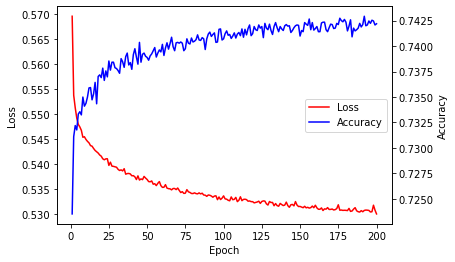

In [76]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5619 - accuracy: 0.7315 - 210ms/epoch - 785us/step
Loss: 0.5619295835494995, Accuracy: 0.7315452098846436


In [ ]:
# Export and save model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

In [78]:
# Export and save model to HDF5 file
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")